In [74]:
import matplotlib.pyplot as yplt
import matplotlib as plt
import scipy.linalg as la
import numpy as np

In [75]:
"""On cherche les pulsations propres
    --> On passe en complexe, sans amortissement ni frottements visqueux
        --> w2 = M^(-1)*K
    --> Il y a autant de mode propre que de ddl
"""

def modePropre(M,K):
    eigvals, eigvecs = la.eig(K, M)

    #vecPropre = np.transpose(eigvecs)

    # En théorie il faudrait réorganiser les matrices pour reclasser les modes

    #print("\nValeurs propres :\n", valPropre)
    #print("\nVecteurs propres :\n", vecPropre)

    # En théorie il faudrait réorganiser les matrices pour reclasser les modes
    return(eigvals, eigvecs)

In [76]:
# Tracage des déformations modales :

def DeformeeModale(M, K, Nddl):
    x = np.linspace(0, Nddl+1,Nddl+2) #Liste des abscisses
    #print(x)

    A = modePropre(M, K)
    valp = A[0]
    vecp = A[1]

    y = np.zeros([Nddl, len(x)])
    #print(vecp)
    for i, ln in enumerate(vecp):
        #print(ln, " -", len(y[i][1:-1]))
        y[i][1:-1] = ln/ln[0]

    #print(y)

    for i, ln in enumerate(y):
        yplt.plot(x, ln, label="Mode" + str(i+1))
    yplt.title("Déformée modale")
    yplt.grid()
    yplt.legend()

In [77]:
"""On cherche maintenant la reponse en fréquence
    --> X=A-1F"""

def repFrequence(M, K, F, fmin, fmax, Nddl):
    convPulsFreq = 1/(2*3.14)
    convRadDeg = 180/3.14

    w = np.linspace(fmin/convPulsFreq, fmax/convPulsFreq, 2000)
    
    Teta = np.zeros([Nddl, len(w)])

    for i, x in enumerate(w):
        A = K - (x**2)*M
        #print("\n", A, "\n")

        B = np.linalg.inv(A)

        X = np.dot(B,F)
        #print("\nX :\n", X)
        for j,Y in enumerate(X):
            Teta[j][i] = np.abs(Y*convRadDeg)
    
    return(w*convPulsFreq, Teta)

### Exercice 4 - Vibration en torsion d'une ligne d'arbre avec réducteur

In [78]:
# Définition des constantes 
J = 7.62e-4 #kg.m2
J3 = J/4
Kt = 3.73e3 #N.m/rad
Me = 1 #N.m
r = -2 #-
Nddl = 3 #T1, T2, A4

# Définition des matrices
M = np.zeros([Nddl, Nddl])
K = np.zeros([Nddl, Nddl])
F = np.zeros(Nddl)

# Remplissage des matrices
  # Pour K

K[0] = [2*Kt, -Kt, 0]
K[1] = [-Kt, Kt*(1+r**2), -Kt*r**2]
K[2] = [0, -Kt*r**2, Kt*r**2]

"""for i in range (1, Nddl-1):
    K[i][i] = Kt*(1+r**2)
    K[i][i-1] = -Kt
    K[i][i+1] = -Kt*r**2
K[0][0] = 2*Kt
K[0][1] = -Kt
K[-1][-1] = Kt*r**2
K[-1][-2] = -Kt*r**2"""

print("K:\n", K, "\n")

  # Pour M
M[0][0] = J
M[1][1] = J+J3*r**2
M[2][2] = J*r**2

print("M: \n", M)

  # Pour F
F[0]=Me

K:
 [[  7460.  -3730.      0.]
 [ -3730.  18650. -14920.]
 [     0. -14920.  14920.]] 

M: 
 [[0.000762 0.       0.      ]
 [0.       0.001524 0.      ]
 [0.       0.       0.003048]]


Valeurs propres :
 [17562191.97166494+0.j  8988890.50826208+0.j   371489.69855067+0.j]

Vecteurs propres :
 [[ 0.50653302  0.96896639  0.33264227]
 [-0.80425904  0.15858458  0.64003983]
 [ 0.31079206 -0.18961819  0.69260244]]


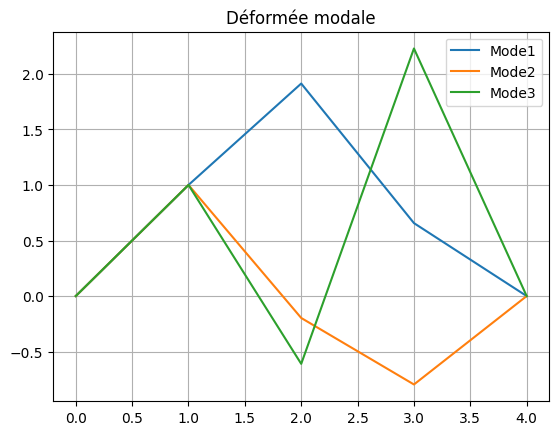

In [79]:
A = modePropre(M, K)
print("Valeurs propres :\n", A[0])
print("\nVecteurs propres :\n", A[1])

DeformeeModale(M, K, Nddl)

[0.00000000e+00 4.50225113e-01 9.00450225e-01 ... 8.99099550e+02
 8.99549775e+02 9.00000000e+02]



[[1.53685900e-02 1.53687657e-02 1.53692929e-02 ... 3.51200131e-03
  3.50656452e-03 3.50114265e-03]
 [1.53685900e-02 1.53689163e-02 1.53698953e-02 ... 4.81067119e-04
  4.79409179e-04 4.77759246e-04]
 [1.53685900e-02 1.53689414e-02 1.53699957e-02 ... 8.72605183e-05
  8.68569937e-05 8.64558196e-05]]



Objet1 -- Xmax =9.5466deg en f=477Hz
Objet2 -- Xmax =3.77959deg en f=667Hz
Objet3 -- Xmax =4.08193deg en f=97Hz


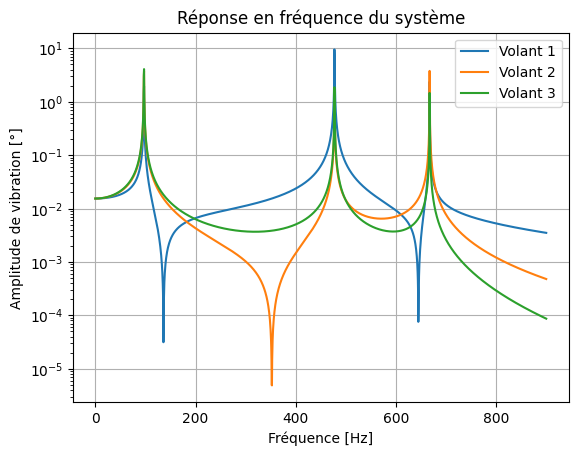

In [80]:
data = repFrequence(M, K, F, 0, 900, Nddl)
print(data[0])
print("\n\n")
print(data[1])

for i, ln in enumerate(data[1]):
    yplt.plot(data[0], ln, label="Volant "+str(i+1))
yplt.title("Réponse en fréquence du système")
yplt.grid()
yplt.xlabel("Fréquence [Hz]")
yplt.ylabel("Amplitude de vibration [°]")
yplt.legend()

yplt.yscale('log')
#" - max def = " + max(ln)) + " en f="+ str(np.where(ln == max(ln)[0][0])*convPulsFreq)

print("\n\n")
for i, ln in enumerate(data[1]):
    txt = "Objet" + str(i+1) + " -- Xmax ="
    txt += str(round(max(ln),5)) + "deg en f="
    txt += str(round(data[0][np.where(ln == max(ln))[0][0]])) + "Hz"
    print(txt)